In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib. pyplot as plt
from tqdm import tqdm_notebook as tqdm
from collections import Counter
import os

In [2]:
os.chdir(r"C:\Users\Vikram\House Predictions")

In [3]:
os.getcwd()

'C:\\Users\\Vikram\\House Predictions'

In [4]:
data = pd.read_csv(r"C:\Users\Vikram\House Predictions\kc_house_data.csv")

In [5]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
# Number of rows in the dataset
len(data)

21613

In [7]:
# more info on the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


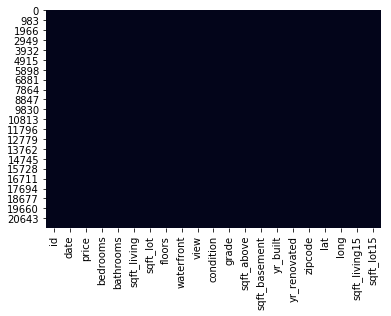

In [8]:
sns.heatmap(data.isnull(), cbar=False)

In [9]:
#data.isnull().sum()

In [10]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


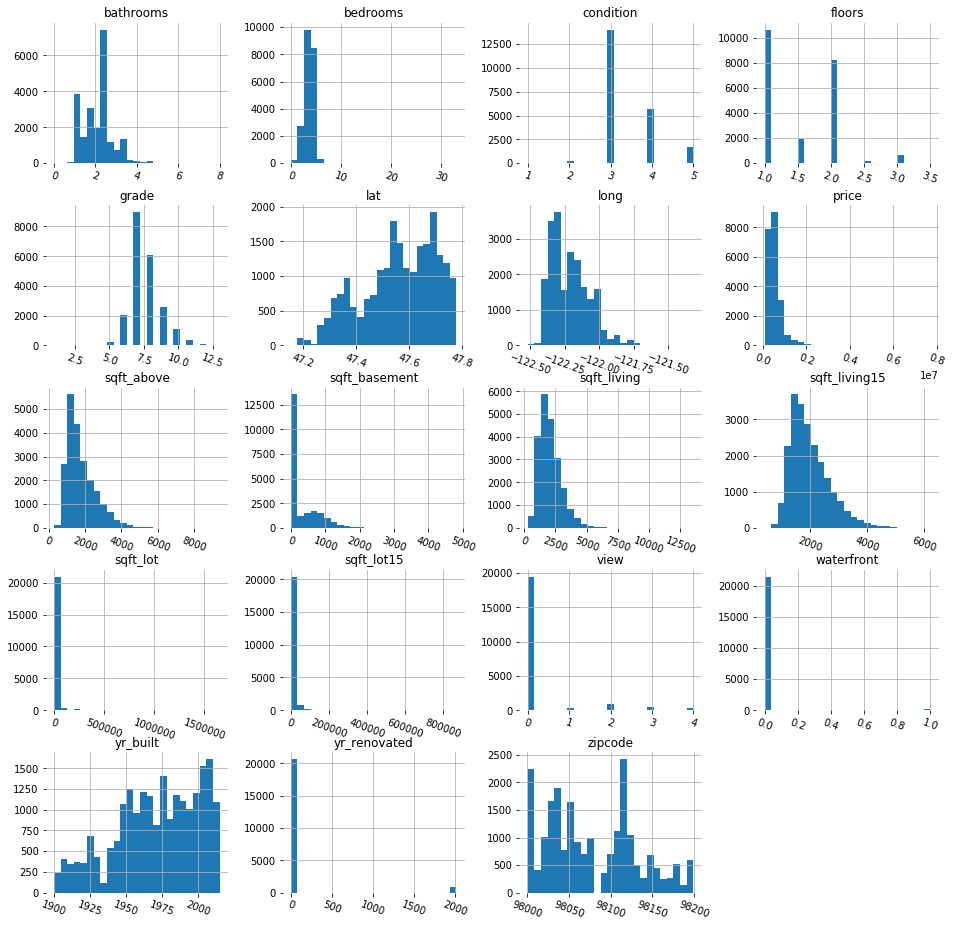

In [11]:
# Histograms

data1=data.drop(["id", "date"], axis=1)
h = data1.hist(bins=25,figsize=(16,16),xlabelsize='10',ylabelsize='10',xrot=-20)
sns.despine(left=True, bottom=True)
[x.title.set_size(12) for x in h.ravel()];
[x.yaxis.tick_left() for x in h.ravel()];

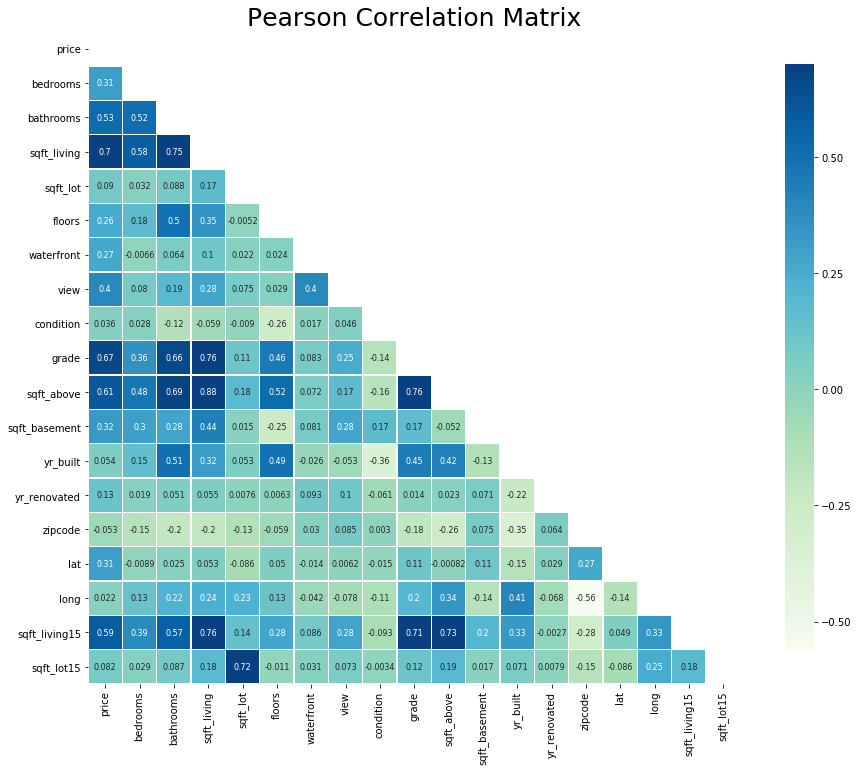

In [12]:
#Pearson's Correlation Matrix

mask = np.zeros_like(data1.corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation Matrix',fontsize=25)

sns.heatmap(data1.corr(),linewidths=0.25,vmax=0.7,square=True,cmap="GnBu",
            linecolor='w',annot=True,annot_kws={"size":8}, mask=mask,cbar_kws={"shrink": .9});

In [9]:
#data.yr_renovated.value_counts()

In [14]:
X = data1.drop(["price"], axis=1)
y = data1["price"]

In [15]:
from sklearn.model_selection import train_test_split
import math, time, random, datetime
from time import time

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)
print("Number of rows in train dataset: {}" .format(len(X_train)))
print("Number of rows in Test dataset: {}" . format(len(X_test)))

Number of rows in train dataset: 17290
Number of rows in Test dataset: 4323


In [17]:
y_test.head()

17384     297000.0
722      1578000.0
2680      562100.0
18754     631500.0
14554     780000.0
Name: price, dtype: float64

In [22]:
# Machine Learning imports
from sklearn import linear_model
#from sklearn.preprocessing import PolynomialFeatures
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn import metrics
#from sklearn.metrics import r2_score


In [47]:
classifiers = []
model1 = linear_model.LinearRegression()
classifiers.append(model1)
model2 = svm.SVR()
classifiers.append(model2)
model3 = tree.DecisionTreeRegressor()
classifiers.append(model3)
model4 = XGBRegressor()
classifiers.append(model4)
model5 = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0, loss='ls')
classifiers.append(model5)

In [48]:
def fit_ml_algo(algo, X_train, y_train, X_test, y_test):
    model = algo.fit(X_train, y_train)
    pred = algo.predict(X_test)
    rmse = float(format(np.sqrt(metrics.mean_squared_error(y_test,pred)),'.3f'))
    train_rsqr = format(algo.score(X_train, y_train),'.3f')
    test_rsqr = format(algo.score(X_test, y_test),'.3f')
    #rsqr = float(format(algo.r2_score(y_test,pred)),'.3f')
    acc_cv = float(format(cross_val_score(algo, X, y, cv=5).mean(),'.3f'))
    return pred, rmse, train_rsqr, test_rsqr, acc_cv

In [49]:
evaluation = pd.DataFrame({'Model': [],
                           'Root Mean Squared Error (RMSE)':[],
                           'R-Squared (training)':[],
                           'R-Squared (test)':[],
                           '5-Fold Cross Validation':[]})

In [50]:
import time
for clf in classifiers:
    start_time = time.time()
    pred_log, rmse_log, train_rsqr_log, test_rsqr_log, acc_cv_log = fit_ml_algo(clf, X_train, y_train, X_test, y_test)
    log_time = (time.time()-start_time)
    print("RMSE for %s:  %s" % (clf, rmse_log))
    print("R-Squared (train data) for %s:  %s" % (clf, train_rsqr_log))
    print("R-Squared (test data) for %s:  %s" % (clf, test_rsqr_log))
    print("5 fold cross validation for %s: %s" % (clf, acc_cv_log))
    print("Running Time for %s: %s" % (clf, datetime.timedelta(seconds=log_time)))
    r = evaluation.shape[0]
    evaluation.loc[r] = [clf, rmse_log,train_rsqr_log, test_rsqr_log, acc_cv_log]
   # float(format(knnreg.score(train_data_dm[features],train_data_dm['price']),'.3f'))

RMSE for LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False):  190473.376
R-Squared (train data) for LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False):  0.701
R-Squared (test data) for LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False):  0.695
5 fold cross validation for LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False): 0.695
Running Time for LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False): 0:00:00.159599


C:\Users\Shalini\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Shalini\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Shalini\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Shalini\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: Fut

RMSE for SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False):  353181.721
R-Squared (train data) for SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False):  -0.058
R-Squared (test data) for SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False):  -0.049
5 fold cross validation for SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False): -0.062
Running Time for SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False): 0:07:37.992114
RMSE for DecisionTreeRegressor(criterion='m

C:\Users\Shalini\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:26:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shalini\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:26:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shalini\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:26:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shalini\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:26:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shalini\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:26:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Shalini\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:26:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE for XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1):  125445.556
R-Squared (train data) for XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, 

In [51]:
evaluation.head()

,Model,Root Mean Squared Error (RMSE),R-Squared (training),R-Squared (test),5-Fold Cross Validation
0,"LinearRegression(copy_X=True, fit_intercept=Tr...",190473.376,0.701,0.695,0.695
1,"SVR(C=1.0, cache_size=200, coef0=0.0, degree=3...",353181.721,-0.058,-0.049,-0.062
2,"DecisionTreeRegressor(criterion='mse', max_dep...",160846.447,0.999,0.782,0.752
3,"XGBRegressor(base_score=0.5, booster='gbtree',...",125445.556,0.899,0.868,0.864
4,([DecisionTreeRegressor(criterion='friedman_ms...,173489.075,0.750,0.747,0.731


In [56]:
evaluation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 0 to 4
Data columns (total 5 columns):
Model                             5 non-null object
Root Mean Squared Error (RMSE)    5 non-null float64
R-Squared (training)              5 non-null object
R-Squared (test)                  5 non-null object
5-Fold Cross Validation           5 non-null float64
dtypes: float64(2), object(3)
memory usage: 240.0+ bytes


In [73]:
evaluation.to_csv(r"C:\Users\Shalini\Evaluation.csv")